In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [559]:
# lode data
path = 'D:\MAIM\week_4\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [560]:
# Display summary information including data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [561]:
# Descriptive statistics including categorical variables
display(df.describe(include='all'))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [562]:
# Remove the 'customerID' column as it is a unique identifier with no predictive value
df.drop(columns='customerID', inplace=True)

In [563]:
# Define columns with binary categorical variables to map Yes/No and Male/Female to 1/0
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'
]

In [564]:
# Apply mapping
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# Confirm 'SeniorCitizen' column is already numeric (0 or 1)
print(f"Unique values in 'SeniorCitizen': {df['SeniorCitizen'].unique()}")

Unique values in 'SeniorCitizen': [0 1]


In [565]:
# One-hot encode categorical variables with multiple categories
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [566]:
# Convert 'TotalCharges' to numeric and handle missing values by imputing the median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

In [567]:
df = df.dropna()

In [568]:
# Verify if there are any remaining missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [569]:
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset with stratification to maintain the target distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [570]:

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 3868 samples
Test set size: 967 samples


In [571]:
# Select relevant features for clustering analysis
clustering_features = ['MonthlyCharges', 'tenure'] + [col for col in df.columns if col.startswith('Contract_')]

X_clustering = df[clustering_features]

# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)


In [572]:
# Calculate within-cluster sum of squares (inertia) for k=1 to 10
inertia_values = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

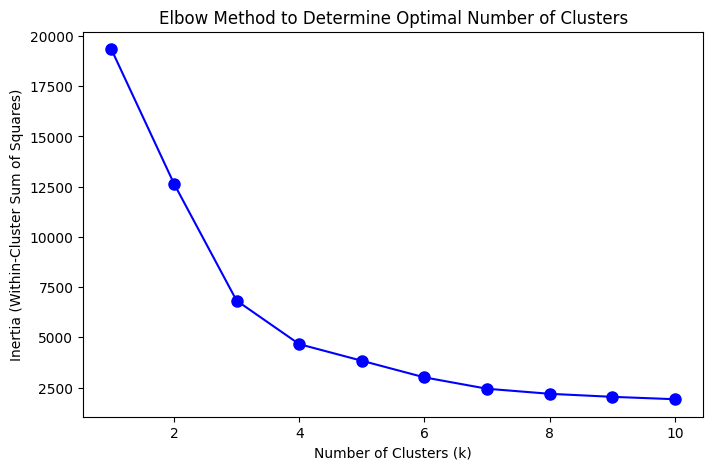

In [573]:
# Plot the elbow curve to visualize the optimal cluster count
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [574]:
# Apply K-Means with chosen number of clusters (e.g., 3 based on elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Append cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Analyze cluster centers and characteristics by averaging feature values per cluster
cluster_summary = df.groupby('Cluster')[clustering_features].mean()
display(cluster_summary)



,MonthlyCharges,tenure,Contract_One year,Contract_Two year
Cluster,,,,
0,90.290594,62.963046,0.0,1.000000
1,78.223522,19.509066,0.0,0.001007
2,84.758402,47.101660,1.0,0.000000


In [575]:
from sklearn.impute import SimpleImputer

# Impute categorical missing values with mode
cat_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

imputer_cat = SimpleImputer(strategy='most_frequent')

X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])


In [576]:
# Optional: Count of customers in each cluster
print("Number of customers per cluster:")
print(df['Cluster'].value_counts())

Number of customers per cluster:
Cluster
1    2978
2     964
0     893
Name: count, dtype: int64


In [577]:
# Instantiate and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [578]:
def evaluate_classification_model(model, X_eval, y_true):
    y_pred = model.predict(X_eval)
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

print("Logistic Regression Model Performance on Test Set:")
evaluate_classification_model(log_reg, X_test, y_test)


Logistic Regression Model Performance on Test Set:
Accuracy:  0.7963
Precision: 0.7069
Recall:    0.6467
F1 Score:  0.6755

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       650
           1       0.71      0.65      0.68       317

    accuracy                           0.80       967
   macro avg       0.77      0.76      0.76       967
weighted avg       0.79      0.80      0.79       967



In [579]:
# Instantiate and train Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [580]:

print("Random Forest Model Performance on Test Set:")
evaluate_classification_model(random_forest, X_test, y_test)

Random Forest Model Performance on Test Set:
Accuracy:  0.7622
Precision: 0.6776
Recall:    0.5237
F1 Score:  0.5907

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       650
           1       0.68      0.52      0.59       317

    accuracy                           0.76       967
   macro avg       0.73      0.70      0.71       967
weighted avg       0.75      0.76      0.75       967



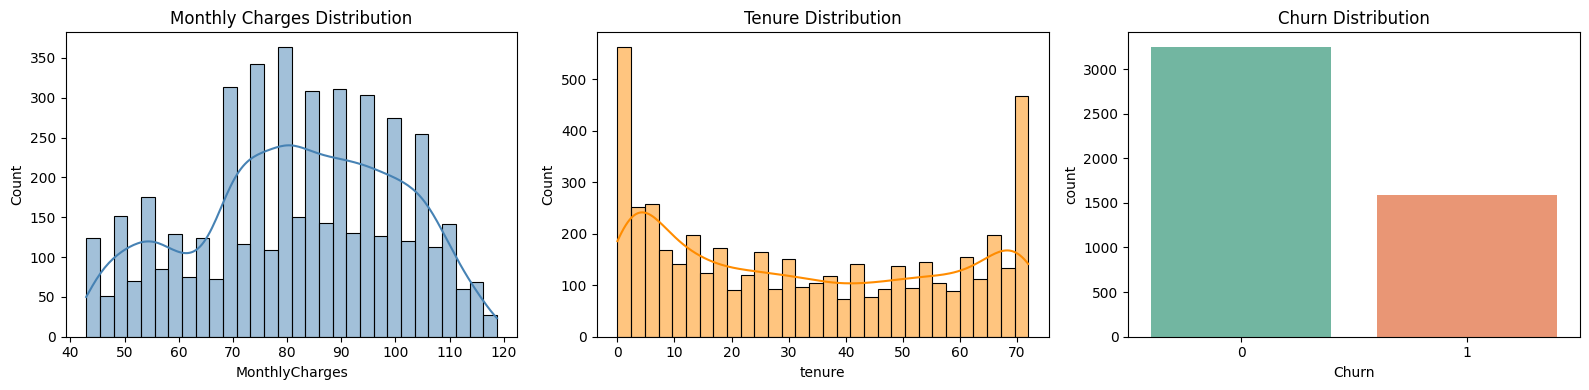

In [581]:
# Visualize distributions of key numerical features and churn counts
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='steelblue')
plt.title('Monthly Charges Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['tenure'], bins=30, kde=True, color='darkorange')
plt.title('Tenure Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')

plt.tight_layout()
plt.show()

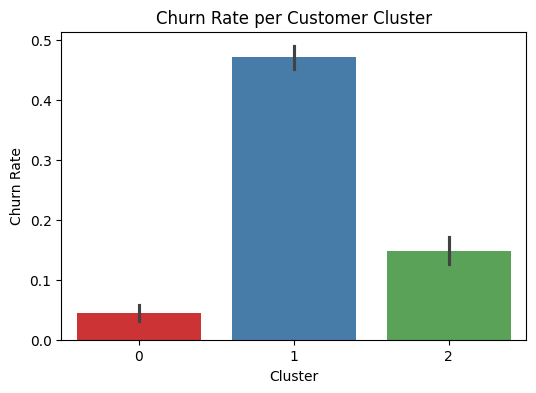

In [582]:
# Visualize churn rate by cluster
plt.figure(figsize=(6, 4))
sns.barplot(x='Cluster', y='Churn', data=df, palette='Set1')
plt.title('Churn Rate per Customer Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()

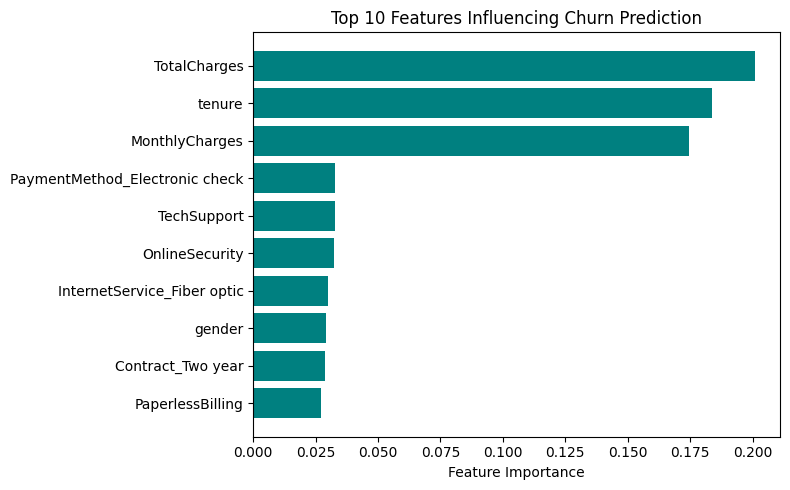

In [583]:
# Plot top 10 feature importances from Random Forest
importances = random_forest.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Influencing Churn Prediction')
plt.tight_layout()
plt.show()

## Summary of Analysis and Findings:

- Data preprocessing included cleaning missing values and encoding categorical variables properly.
- K-Means clustering revealed meaningful customer segments based on monthly charges, tenure, and contract types.
- Churn rates vary significantly among these customer clusters, suggesting targeted retention strategies.
- Random Forest classifier outperformed Logistic Regression in predicting customer churn.
- Key features influencing churn include Monthly Charges, Contract Type, Payment Method, and Tenure.


---

In [584]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')


In [585]:

# Replace 'No internet service' and 'No phone service' with 'No' in specific columns
cols_replace_no = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_replace_no:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})



In [586]:
# Map binary columns from Yes/No and Male/Female to 1/0
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0, 'Female':0, 'Male':1})

# Convert TotalCharges to numeric and fill missing with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [587]:


# Convert any boolean columns in X to integers (0/1) to avoid imputer errors
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Check datatypes to confirm
print(X.dtypes.value_counts())


int64      14
float64     9
Name: count, dtype: int64


In [588]:
# Stratified split to maintain churn ratio
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3868
Test set size: 967


In [591]:
# Identify feature types for preprocessing
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

categorical_features = [col for col in X.columns if col not in numeric_features + binary_features]

print(f"Numeric features: {numeric_features}")
print(f"Binary features: {binary_features}")
print(f"Categorical features: {categorical_features}")


Numeric features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Binary features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
Categorical features: ['InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [592]:
# Numeric pipeline: median imputation + standard scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Binary pipeline: mode imputation (should be rare if any missing)
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Categorical pipeline: mode imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('bin', binary_transformer, binary_features),
    ('cat', categorical_transformer, categorical_features)
])


In [593]:
# Full pipeline: preprocessing + logistic regression classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


In [594]:
model_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [595]:
y_pred = model_pipeline.predict(X_test)

print("Model Performance Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:
Accuracy:  0.7942
Precision: 0.7034
Recall:    0.6435
F1 Score:  0.6722

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       650
           1       0.70      0.64      0.67       317

    accuracy                           0.79       967
   macro avg       0.77      0.76      0.76       967
weighted avg       0.79      0.79      0.79       967

